<center>

### COSC2753 - Machine Learning

# **Exploratory Data Analysis (EDA)**

<center>────────────────────────────</center>
&nbsp;

## Table of Contents

</center>

<div style="text-align: left;">

<div style="display: inline-block; text-align: left;">

<h3>

[**I. Introduction**](#introduction)

</h3>

<h3>
    
[**II. Libraries Import and Data Preprocessing**](#libraries-import-and-data-preprocessing)

</h3>

<h4>

- [1. Importing Libraries](#1-importing-libraries)

</h4>

<h4>

- [2. Global Configuration](#2-global-configuration)

</h4>

<h4>

- [3. Data Loading](#3-data-loading)

</h4>

<h4>

- [4. Data Preprocessing](#4-data-preprocessing)

</h4>

<h5 style="margin-left: 20px;">

- [4.1. Data Types](#41-prerequisites)

</h5>

<h5 style="margin-left: 20px;">

- [4.2. Data Overview](#42-data-overview)

</h5>

<h5 style="margin-left: 20px;">

- [4.3. Data Validation](#43-data-validation)

</h5>

<h3>

[**III. Data Visualization**](#data-visualization)

</h3>

<h3>

[**IV. Data Cleaning**](#data-cleaning)

</h3>

<h3>

[**V. Exploratory Data Analysis**](#exploratory-data-analysis)

</h3>

<h3>
    
[**VI. Conclusion**](#conclusion)

</h3>

<h3>
    
[**VII. References**](#references)

</div>

&nbsp;

<center><em><sub>─────── End Of Section ───────</sub></em></center>


## I. Introduction

This notebook focuses on Exploratory Data Analysis (EDA) as the foundation for our machine learning workflow with the provided datasets. Through EDA, we will gain a comprehensive understanding of the data, including:

- Data cleaning and preprocessing.
- Features/Target variables distribution and relationships analysis.
- Correlation analysis.
- Outliers detection.
- Model selection and evaluation.

Upon finishing, this notebook will provide valuable insights of the data for subsequent stages.

<center><em><sub>─────── End Of Section ───────</sub></em></center>

## II. Libraries Import and Data Preprocessing 

### 1. Importing Libraries

In [161]:
print("Importing packages...")

# Import installed python packages
import pandas as pd  #  Data manipulation
import numpy as np  # Numerical operations
import seaborn as sns  # Visualization
import matplotlib  # Visualization
import tabulate  # Pretty print
from sklearn.preprocessing import MinMaxScaler, StandardScaler  # Feature scaling
import time  # Time operations

# Import user-defined python scripts
import sys
import importlib

sys.path.append("../../")  # Root directory
modules_to_reload = [
    "scripts.outlier_detector",
    "scripts.styler",
    "scripts.neko",
    "scripts.utils",
]

# Reload modules if they have been modified
start_time = time.time()  # Start time
missing_modules = []  # Missing modules

# Reload modules
for module_name in modules_to_reload:
    if module_name in sys.modules:
        importlib.reload(sys.modules[module_name])
    else:
        missing_modules.append(module_name)

# Recache missing modules
if missing_modules:
    print(f"Modules {missing_modules} not found. \nRecaching...")


from scripts.outlier_detector import OutlierDetector  # Outlier detection
from scripts.styler import Styler  # Visualization
from scripts.neko import Neko  # Panda extension
from scripts.utils import Utils  # Utility functions

# Version checking
print("Checking package versions...")
try:
    with open("../../requirements.txt", "r") as file:
        requirements = file.readlines()
        file.close()
except FileNotFoundError:
    print(f"File '../../requirements.txt' not found.")

Utils.version_check(np, requirements=requirements) # Check numpy version
Utils.version_check(pd, requirements=requirements) # Check pandas version
Utils.version_check(sns, requirements=requirements) # Check seaborn version
Utils.version_check(matplotlib, requirements=requirements) # Check matplotlib version
Utils.version_check(tabulate, requirements=requirements) # Check tabulate version

end_time = time.time()  # End time

runtime = end_time - start_time  # Runtime

print(f">>> Done in: {round(runtime, 3)}, seconds")

Importing packages...
Checking package versions...
>>> numpy is up to date: 1.26.4
>>> pandas is up to date: 2.2.1
>>> seaborn is up to date: 0.13.2
>>> matplotlib is up to date: 3.8.3
>>> tabulate is up to date: 0.9.0
>>> Done in: 0.002, seconds


### 2. Global Configuration

In [162]:
# Set global parameters
start_time = time.time()  # Start time
print("Initializing project...")

# Initialize objects
styler = Styler()  # Text Styler
neko = Neko()  # Panda extension
bullet = ">>>"  # Bullet point
plt = matplotlib.pyplot  # Matplotlib

end_time = time.time()  # End time
runtime = end_time - start_time  # Runtime

# Configuration
pd.set_option(
    "display.max_columns", None
)  # This sets maximum number of columns to be displayed to None
pd.set_option(
    "display.max_rows", None
)  # This sets maximum number of rows to be displayed to None
pd.set_option(
    "display.precision", 3
)  # This sets the precision for displaying float values to 2 decimal places

print(f"{bullet} Project initialized successfully...\n")

text = f"{bullet} Done in: {round(runtime, 3)} seconds"
print(text)

Initializing project...


    /\_____/\
   /  o   o  \
  ( ==  ^  == )       Neko has arrived!
   )         (        An data visualizing extension for analyzing DataFrames.
  (           )       Art: https://www.asciiart.eu/animals/cats.
 ( (  )   (  ) )
(__(__)___(__)__)

>>> Project initialized successfully...

>>> Done in: 0.0 seconds


### 3. Data Loading

In [163]:
# Load the datasets
try:
    start_time = time.time()  # Start time

    df_train = pd.read_csv("../../data/raw/data_train.csv")  # Training dataset

    styler.draw_box("Dataset Overview")  # Display box

    # Get data essence
    df_train_essense = neko.essense(df_train)  # Data essence

    print(df_train_essense)

    end_time = time.time()  # End time
    runtime = end_time - start_time  # Runtime
    text = f"\n>>> Done in: {round(runtime, 3)} seconds"  # Runtime text

    print(text)  # Display runtime

except Exception as e:
    text = f" {bullet} Error: {str(e)}"
    print(text)

┌────────────────────┐
│  Dataset Overview  │
└────────────────────┘
╭────┬─────────────────────────────┬───────────╮
│    │ Attribute                   │ Value     │
├────┼─────────────────────────────┼───────────┤
│  0 │ Number of Rows              │ 202944    │
│  1 │ Number of Columns           │ 25        │
│  2 │ Data Types                  │ ['int64'] │
│  3 │ Total Missing Values        │ 0         │
│  4 │ Columns with Missing Values │ []        │
│  5 │ Number of Duplicates        │ 0         │
│  6 │ Memory Usage (MB)           │ 38.7      │
╰────┴─────────────────────────────┴───────────╯

>>> Done in: 0.222 seconds


### **Initial Data Exploration**

This initial exploration of the data yielded the following key observations:

- **Data Loading:** The dataset comprises approximately `200,000` rows and `25` columns. Given its size, careful selection of data cleaning and preprocessing techniques will be essential to ensure data quality and integrity for further analysis.

- **Data Type Consistency:** A positive aspect is that all columns possess the same data type (`int64`), potentially simplifying the data cleaning process.

- **Missing Value Assessment:** An initial check for missing values (`null`, `NaN`, or `empty values`) was conducted. This ensures the data is not empty or containing invalid values.

- **Duplicate Detection:** No duplicates were identified within the dataset at this stage (with the presence of the `Id` column).

### **Feature Explanation**

| Variable             | Description                                                                                                                                                                  | Category    |
| -------------------- | ---------------------------------------------------------------------------------------------------------------------------------------------------------------------------- | ----------- |
| ID                   | Patient ID                                                                                                                                                                   | Numerical   |
| Status               | 0 = no diabetes, 1 = prediabetes or diabetes                                                                                                                                 | Categorical |
| HighBP               | 0 = no high BP, 1 = high BP                                                                                                                                                  | Categorical |
| HighChol             | 0 = no high cholesterol, 1 = high cholesterol                                                                                                                                | Categorical |
| CholCheck            | 0 = no cholesterol check in 5 years, 1 = yes cholesterol check in 5 years                                                                                                    | Categorical |
| BMI                  | Body Mass Index                                                                                                                                                              | Numerical   |
| Smoker               | 0 = no, 1 = yes (smoked at least 100 cigarettes in lifetime)                                                                                                                 | Categorical |
| Stroke               | 0 = no, 1 = yes (history of stroke)                                                                                                                                          | Categorical |
| HeartDiseaseorAttack | 0 = no, 1 = yes (coronary heart disease or myocardial infarction)                                                                                                            | Categorical |
| PhysActivity         | 0 = no, 1 = yes (physical activity in past 30 days, excluding job)                                                                                                           | Categorical |
| Fruits               | 0 = no, 1 = yes (consume fruit ≥ 1 time per day)                                                                                                                             | Categorical |
| Veggies              | 0 = no, 1 = yes (consume vegetables ≥ 1 time per day)                                                                                                                        | Categorical |
| HvyAlcoholConsump    | 0 = no, 1 = yes (heavy alcohol consumption)                                                                                                                                  | Categorical |
| AnyHealthcare        | 0 = no, 1 = yes (health care coverage)                                                                                                                                       | Categorical |
| NoDocbcCost          | 0 = no, 1 = yes (unable to see doctor due to cost)                                                                                                                           | Categorical |
| GenHlth              | Scale 1-5: 1 = excellent, 2 = very good, 3 = good, 4 = fair, 5 = poor                                                                                                        | Categorical |
| MentHlth             | Number of days in past 30 days with poor mental health (scale 1-30 days)                                                                                                     | Numerical   |
| PhysHlth             | Number of days in past 30 days with poor physical health (scale 1-30 days)                                                                                                   | Numerical   |
| DiffWalk             | 0 = no, 1 = yes (serious difficulty walking or climbing stairs)                                                                                                              | Categorical |
| Sex                  | 0 = female, 1 = male                                                                                                                                                         | Categorical |
| Age                  | 13-level age category: 1 = 18-24, 9 = 60-64, 13 = 80 or older                                                                                                                | Categorical |
| Education            | Scale 1-6: 1 = Never attended school or only kindergarten, 2 = Grades 1 through 8, 3 = Grades 9 through 11, 4 = Grade 12 or GED, 5 = College 1-3 years, 6 = College 4+ years | Categorical |
| Income               | Scale 1-8: 1 = less than $10,000, 5 = less than $35,000, 8 = $75,000 or more                                                                                                 | Categorical |
| ExtraMedTest         | Result of an extra medical test (range -100 to 100)                                                                                                                          | Numerical   |
| ExtraAlcoholTest     | Result of an extra alcohol test (range -100 to 100)                                                                                                                          | Numerical   |

### **Conclusion**

- The `Id` column will be excluded in accordance with project specifications.

- This initial exploration reveals that the majority of the columns contain `categorical` features. This suggests a potential focus on `categorical data analysis` techniques for further exploration and model selection.

- An initial examination of the target variable (`Status`) reveals it consists of binary values (`0` or `1`). This characteristic indicates a `classification` problem, where we aim to predict the category (`0` or `1`) for new data points.

  &rArr; Given this binary nature, `Logistic Regression` emerges as a strong candidate for the initial model selection.


### 4. Data Preprocessing

#### 4.1. Prerequisites

In [164]:
# Remove the Id column from the dataset as required
df_train.drop("Id", axis=1, inplace=True)

styler.draw_box("Dataset Overview (Id column removed)")  # Display box

df_train.info()  # Display the first five rows of the dataset

┌────────────────────────────────────────┐
│  Dataset Overview (Id column removed)  │
└────────────────────────────────────────┘
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202944 entries, 0 to 202943
Data columns (total 24 columns):
 #   Column                Non-Null Count   Dtype
---  ------                --------------   -----
 0   HighBP                202944 non-null  int64
 1   HighChol              202944 non-null  int64
 2   CholCheck             202944 non-null  int64
 3   BMI                   202944 non-null  int64
 4   Smoker                202944 non-null  int64
 5   Stroke                202944 non-null  int64
 6   HeartDiseaseorAttack  202944 non-null  int64
 7   PhysActivity          202944 non-null  int64
 8   Fruits                202944 non-null  int64
 9   Veggies               202944 non-null  int64
 10  HvyAlcoholConsump     202944 non-null  int64
 11  AnyHealthcare         202944 non-null  int64
 12  NoDocbcCost           202944 non-null  int64
 13  GenHl

#### 4.2. Data Overview

In [165]:
styler.draw_box("Duplicate Checking (Id column removed)")

# Check for duplicates in the dataset
duplicates = df_train.duplicated().sum()  # Duplicates
if duplicates > 0:
    print(neko.essense(df_train))  # Display data essence

    print(" ")
    text = f"Found {duplicates} duplicates in the dataset"
    styled_text = styler.style(text, bold=True, italic=True)
    print(f"{bullet} {styled_text}")

    # Remove duplicates
    print(f"{bullet} Removing duplicates...")

    start_time = time.time()  # Start time

    df_train.drop_duplicates(inplace=True)  # Remove duplicates

    end_time = time.time()  # End time

    runtime = end_time - start_time  # Runtime

    print(f"{bullet} Done in:", round(runtime, 3), "seconds")
else:
    text = f"No duplicates in the dataset"
    styled_text = styler.style(text, bold=True, italic=True)
    print(f"{bullet} {styled_text}")

print(" ")

styler.draw_box("Duplicate Checking After Removal")

print(neko.essense(data=df_train))  # Display data essence after removal

┌──────────────────────────────────────────┐
│  Duplicate Checking (Id column removed)  │
└──────────────────────────────────────────┘
╭────┬─────────────────────────────┬───────────╮
│    │ Attribute                   │ Value     │
├────┼─────────────────────────────┼───────────┤
│  0 │ Number of Rows              │ 202944    │
│  1 │ Number of Columns           │ 24        │
│  2 │ Data Types                  │ ['int64'] │
│  3 │ Total Missing Values        │ 0         │
│  4 │ Columns with Missing Values │ []        │
│  5 │ Number of Duplicates        │ 208       │
│  6 │ Memory Usage (MB)           │ 37.2      │
╰────┴─────────────────────────────┴───────────╯
 
>>> Found 208 duplicates in the dataset
>>> Removing duplicates...
>>> Done in: 0.077 seconds
 
┌────────────────────────────────────┐
│  Duplicate Checking After Removal  │
└────────────────────────────────────┘
╭────┬─────────────────────────────┬───────────╮
│    │ Attribute                   │ Value     │
├────┼───────

### **Conclusion** 
- Following the removal of the `Id` column, an initial analysis identified `208` duplicate data points within the dataset. 

  &rArr; To ensure data integrity and quality, these duplicates will be `removed` from the dataset before proceeding with further analysis.


In [177]:
# Display the overview of the training dataset
styler.draw_box("Dataset Description")
df_train.describe()

┌───────────────────────┐
│  Dataset Description  │
└───────────────────────┘


,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,HvyAlcoholConsump,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income,ExtraMedTest,ExtraAlcoholTest,Status
count,202736.000,202736.000,202736.000,202736.000,202736.000,202736.000,202736.000,202736.000,202736.000,202736.000,202736.000,202736.000,202736.000,202736.000,202736.00,202736.000,202736.000,202736.000,202736.000,202736.000,202736.000,202736.000,202736.000,202736.000
mean,0.429,0.425,0.963,28.209,0.443,0.041,0.094,0.756,0.635,0.811,0.056,0.951,0.084,2.515,3.20,4.261,0.169,0.440,8.039,5.049,6.054,-4.451,-4.598,0.176
std,0.495,0.494,0.190,5.823,0.497,0.198,0.293,0.429,0.481,0.391,0.230,0.215,0.277,1.070,7.43,8.740,0.375,0.496,3.052,0.986,2.070,62.239,62.224,0.381
min,0.000,0.000,0.000,16.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000,0.00,0.000,0.000,0.000,1.000,1.000,1.000,-100.000,-100.000,0.000
25%,0.000,0.000,1.000,24.000,0.000,0.000,0.000,1.000,0.000,1.000,0.000,1.000,0.000,2.000,0.00,0.000,0.000,0.000,6.000,4.000,5.000,-55.000,-55.000,0.000
50%,0.000,0.000,1.000,27.000,0.000,0.000,0.000,1.000,1.000,1.000,0.000,1.000,0.000,2.000,0.00,0.000,0.000,0.000,8.000,5.000,7.000,0.000,0.000,0.000
75%,1.000,1.000,1.000,31.000,1.000,0.000,0.000,1.000,1.000,1.000,0.000,1.000,0.000,3.000,2.00,3.000,0.000,1.000,10.000,6.000,8.000,40.000,40.000,0.000
max,1.000,1.000,1.000,45.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,5.000,30.00,30.000,1.000,1.000,13.000,6.000,8.000,100.000,100.000,1.000


In [178]:
# Display the first few rows of the training dataset
styler.draw_box("Daset Overview (First 5 rows)")

df_train.head()

┌─────────────────────────────────┐
│  Daset Overview (First 5 rows)  │
└─────────────────────────────────┘


,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,HvyAlcoholConsump,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income,ExtraMedTest,ExtraAlcoholTest,Status
0,0,0,1,24,1,0,0,1,0,1,0,1,0,2,0,0,0,0,8,4,5,60,0,0
1,0,0,1,28,0,0,0,1,1,1,0,1,0,1,1,0,0,0,2,6,8,0,-64,0
2,0,0,1,36,1,0,0,1,1,0,0,1,1,3,30,30,1,0,3,2,1,-46,0,0
3,0,1,1,35,0,0,0,1,1,1,0,1,0,3,0,0,0,0,8,6,8,-83,-100,0
4,0,1,1,27,0,0,0,1,0,1,0,1,0,3,0,0,0,0,9,5,4,-58,0,0


#### 4.3. Data Validation

##### 4.3.1: Handling Missing Values

In [168]:
# Check for missing / numpy.NaN / None values in the training dataset
styler.draw_box("Null/NaN values checking")

text = neko.is_nan(df_train)
print(f"{bullet} {text}")

┌────────────────────────────┐
│  Null/NaN values checking  │
└────────────────────────────┘
>>> The DataFrame does not contain any NaN values.


##### 4.3.2: Detect Noisy Data

In [169]:
zero_one_columns_error = []  # 0-1 columns with errors
range_columns_error = []  # Range columns with errors

# Columhns with 0 and 1 values
zero_one_columns = [
    "Status",
    "HighBP",
    "HighChol",
    "CholCheck",
    "Smoker",
    "Stroke",
    "HeartDiseaseorAttack",
    "PhysActivity",
    "Fruits",
    "Veggies",
    "HvyAlcoholConsump",
    "AnyHealthcare",
    "NoDocbcCost",
    "DiffWalk",
    "Sex",
]

# Columns with range defined in the dataset description
range_column = {
    "Age": (0, 13),
    "Education": (1, 6),
    "Income": (1, 8),
    "BMI": (16, 45),
    "ExtraMedTest": (-100, 100),
    "ExtraAlcoholTest": (-100, 100),
    "MentHlth": (0, 30),
    "PhysHlth": (0, 30),
    "GenHlth": (1, 5),
}

In [170]:
styler.draw_box("Data Validation (0-1 columns)")

result = []  # Results after checking for invalid values

# Check for invalid values in the training dataset
for column in zero_one_columns:
    # Check for invalid values
    payload = neko.is_data_valid(data=df_train, column=column, valid_values=[0, 1])

    # Append to the error list
    if not payload["is_valid"]:
        zero_one_columns_error.append(column)

    # Show the results
    styled_text = styler.style(payload["message"], bold=True, italic=True)

    result.append([column, styled_text])

table = tabulate.tabulate(
    result,
    headers=["Column", "Status"],
    tablefmt="rounded_grid",
    stralign="left",
    showindex=True,
)

print(table)

┌─────────────────────────────────┐
│  Data Validation (0-1 columns)  │
└─────────────────────────────────┘
╭────┬──────────────────────┬──────────────────────────────────╮
│    │ Column               │ Status                           │
├────┼──────────────────────┼──────────────────────────────────┤
│  0 │ Status               │ All values are within the range. │
├────┼──────────────────────┼──────────────────────────────────┤
│  1 │ HighBP               │ All values are within the range. │
├────┼──────────────────────┼──────────────────────────────────┤
│  2 │ HighChol             │ All values are within the range. │
├────┼──────────────────────┼──────────────────────────────────┤
│  3 │ CholCheck            │ All values are within the range. │
├────┼──────────────────────┼──────────────────────────────────┤
│  4 │ Smoker               │ All values are within the range. │
├────┼──────────────────────┼──────────────────────────────────┤
│  5 │ Stroke               │ All values are wi

In [171]:
styler.draw_box("Data validation (range-based columns)")

result = []  # Results after checking for invalid values

# Check each column against its range
for column, (min_value, max_value) in range_column.items():
    # Check for invalid values
    payload = neko.is_data_in_range(df_train, column, min_value, max_value)

    # Append to the error list
    if not payload["is_valid"]:
        range_columns_error.append(column)

    # Show the results
    styled_text = styler.style(payload["message"], bold=True, italic=True)

    result.append([column, styled_text])

table = tabulate.tabulate(
    result,
    headers=["Column", "Status"],
    tablefmt="rounded_grid",
    stralign="left",
    showindex=True,
)

print(table)

┌─────────────────────────────────────────┐
│  Data validation (range-based columns)  │
└─────────────────────────────────────────┘
╭────┬──────────────────┬──────────────────────────────────╮
│    │ Column           │ Status                           │
├────┼──────────────────┼──────────────────────────────────┤
│  0 │ Age              │ All values are within the range. │
├────┼──────────────────┼──────────────────────────────────┤
│  1 │ Education        │ All values are within the range. │
├────┼──────────────────┼──────────────────────────────────┤
│  2 │ Income           │ All values are within the range. │
├────┼──────────────────┼──────────────────────────────────┤
│  3 │ BMI              │ 4013 invalid values found.       │
├────┼──────────────────┼──────────────────────────────────┤
│  4 │ ExtraMedTest     │ 29515 invalid values found.      │
├────┼──────────────────┼──────────────────────────────────┤
│  5 │ ExtraAlcoholTest │ 29464 invalid values found.      │
├────┼────────

### **Key Observations**

The previous data exploration revealed the following key findings:

- **Missing Values**: The dataset exhibits no missing values. All values in the specified columns (`zero_one_columns`) are confirmed to be either `0` or `1`.

- **Outliers**: Several columns, including `BMI`, `ExtraMedTest`, `ExtraAlcoholTest`, `MenHlth`, and `PhysHlth`, contain outliers that fall outside the allowed range defined in the assignment instructions:

  - **BMI**: The Body Mass Index (BMI) values are expected to fall within the range of `16` to `45`. Outliers outside this range will be addressed, according to Connor B. Weir for BMI Classification Percentile [1].

  - **ExtraMedTest** and **ExtraAlcoholTest**: The values are expected to fall within the range of `-100` to `100`. Outliers outside this range will be addressed. (As per the assignment instructions)

  - **MentHlth** and **PhysHlth**: The features are expected to have values ranging from 1 to 30. However, it's possible that some patients may not report any mental or physical health concerns, potentially resulting in a value of 0. This scenario requires special attention during data cleaning.

### **Addressing Outliers for Improved Data Quality:**

- Outliers can potentially influence the results of our analysis. To ensure data quality and integrity, we will employ a common technique of `winsorizing` outliers, replacing extreme values (outliers) with values at pre-defined thresholds.

- This approach aims to mitigate the impact of extreme values while preserving the overall distribution of the data.


##### 4.3.3: Handling invalid data

In [179]:
styler.draw_box("Enforcing Data Range")

result = []  # Results after checking for invalid values

try:
    start_time = time.time()  # Start time

    # Handle 0-1 columns
    for column in range_columns_error:
        max_value = range_column[column][1]  # Max value
        min_value = range_column[column][0]  # Min value
        df_train[column] = df_train[column].apply(
            lambda x: (
                min_value if x < min_value else (max_value if x > max_value else x)
            )
        )

        text = f"Column '{column}' has been handled successfully"

        styled_text = styler.style(text, bold=True, italic=True)
        print(f"{bullet} {styled_text}")

    text = "All columns have been handled successfully"
    styled_text = styler.style(text, bold=True, italic=True)

    print(f"{bullet} {styled_text}")

    end_time = time.time()  # End time

    runtime = end_time - start_time  # Runtime

    print(f"{bullet} Done in:", round(runtime, 3), "seconds")
except KeyError as e:
    styler.draw_box(f"Error: Column '{e}' not found in the DataFrame.")

┌────────────────────────┐
│  Enforcing Data Range  │
└────────────────────────┘
>>> Column 'BMI' has been handled successfully
>>> Column 'ExtraMedTest' has been handled successfully
>>> Column 'ExtraAlcoholTest' has been handled successfully
>>> All columns have been handled successfully
>>> Done in: 0.143 seconds


##### 4.3.4: Data Revalidation

In [180]:
# Display the status of invalid values after handling

result = []  # Results after checking for invalid values

styler.draw_box("Data Validation (range-based) After Processing")

# Check each column against its range
for column, (min_value, max_value) in range_column.items():
    # Check for invalid values
    payload = neko.is_data_in_range(df_train, column, min_value, max_value)

    # Append to the error list
    if not payload["is_valid"]:
        range_columns_error.append(column)

    result.append([column, payload["message"]])

# Display the status of invalid values after handling
table = tabulate.tabulate(
    result,
    headers=["Column", "Status"],
    tablefmt="rounded_grid",
    stralign="left",
    showindex=True,
)

print(table)

┌──────────────────────────────────────────────────┐
│  Data Validation (range-based) After Processing  │
└──────────────────────────────────────────────────┘
╭────┬──────────────────┬──────────────────────────────────╮
│    │ Column           │ Status                           │
├────┼──────────────────┼──────────────────────────────────┤
│  0 │ Age              │ All values are within the range. │
├────┼──────────────────┼──────────────────────────────────┤
│  1 │ Education        │ All values are within the range. │
├────┼──────────────────┼──────────────────────────────────┤
│  2 │ Income           │ All values are within the range. │
├────┼──────────────────┼──────────────────────────────────┤
│  3 │ BMI              │ All values are within the range. │
├────┼──────────────────┼──────────────────────────────────┤
│  4 │ ExtraMedTest     │ All values are within the range. │
├────┼──────────────────┼──────────────────────────────────┤
│  5 │ ExtraAlcoholTest │ All values are within 

In [174]:
# Display the overview of the training dataset after handling invalid values
df_train.describe()

,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,HvyAlcoholConsump,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income,ExtraMedTest,ExtraAlcoholTest,Status
count,202736.000,202736.000,202736.000,202736.000,202736.000,202736.000,202736.000,202736.000,202736.000,202736.000,202736.000,202736.000,202736.000,202736.000,202736.00,202736.000,202736.000,202736.000,202736.000,202736.000,202736.000,202736.000,202736.000,202736.000
mean,0.429,0.425,0.963,28.209,0.443,0.041,0.094,0.756,0.635,0.811,0.056,0.951,0.084,2.515,3.20,4.261,0.169,0.440,8.039,5.049,6.054,-4.451,-4.598,0.176
std,0.495,0.494,0.190,5.823,0.497,0.198,0.293,0.429,0.481,0.391,0.230,0.215,0.277,1.070,7.43,8.740,0.375,0.496,3.052,0.986,2.070,62.239,62.224,0.381
min,0.000,0.000,0.000,16.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000,0.00,0.000,0.000,0.000,1.000,1.000,1.000,-100.000,-100.000,0.000
25%,0.000,0.000,1.000,24.000,0.000,0.000,0.000,1.000,0.000,1.000,0.000,1.000,0.000,2.000,0.00,0.000,0.000,0.000,6.000,4.000,5.000,-55.000,-55.000,0.000
50%,0.000,0.000,1.000,27.000,0.000,0.000,0.000,1.000,1.000,1.000,0.000,1.000,0.000,2.000,0.00,0.000,0.000,0.000,8.000,5.000,7.000,0.000,0.000,0.000
75%,1.000,1.000,1.000,31.000,1.000,0.000,0.000,1.000,1.000,1.000,0.000,1.000,0.000,3.000,2.00,3.000,0.000,1.000,10.000,6.000,8.000,40.000,40.000,0.000
max,1.000,1.000,1.000,45.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,5.000,30.00,30.000,1.000,1.000,13.000,6.000,8.000,100.000,100.000,1.000


<center><em><sub>─────── End Of Section ───────</sub></em></center>


## Data Visualization

#### 1. Features Distribution

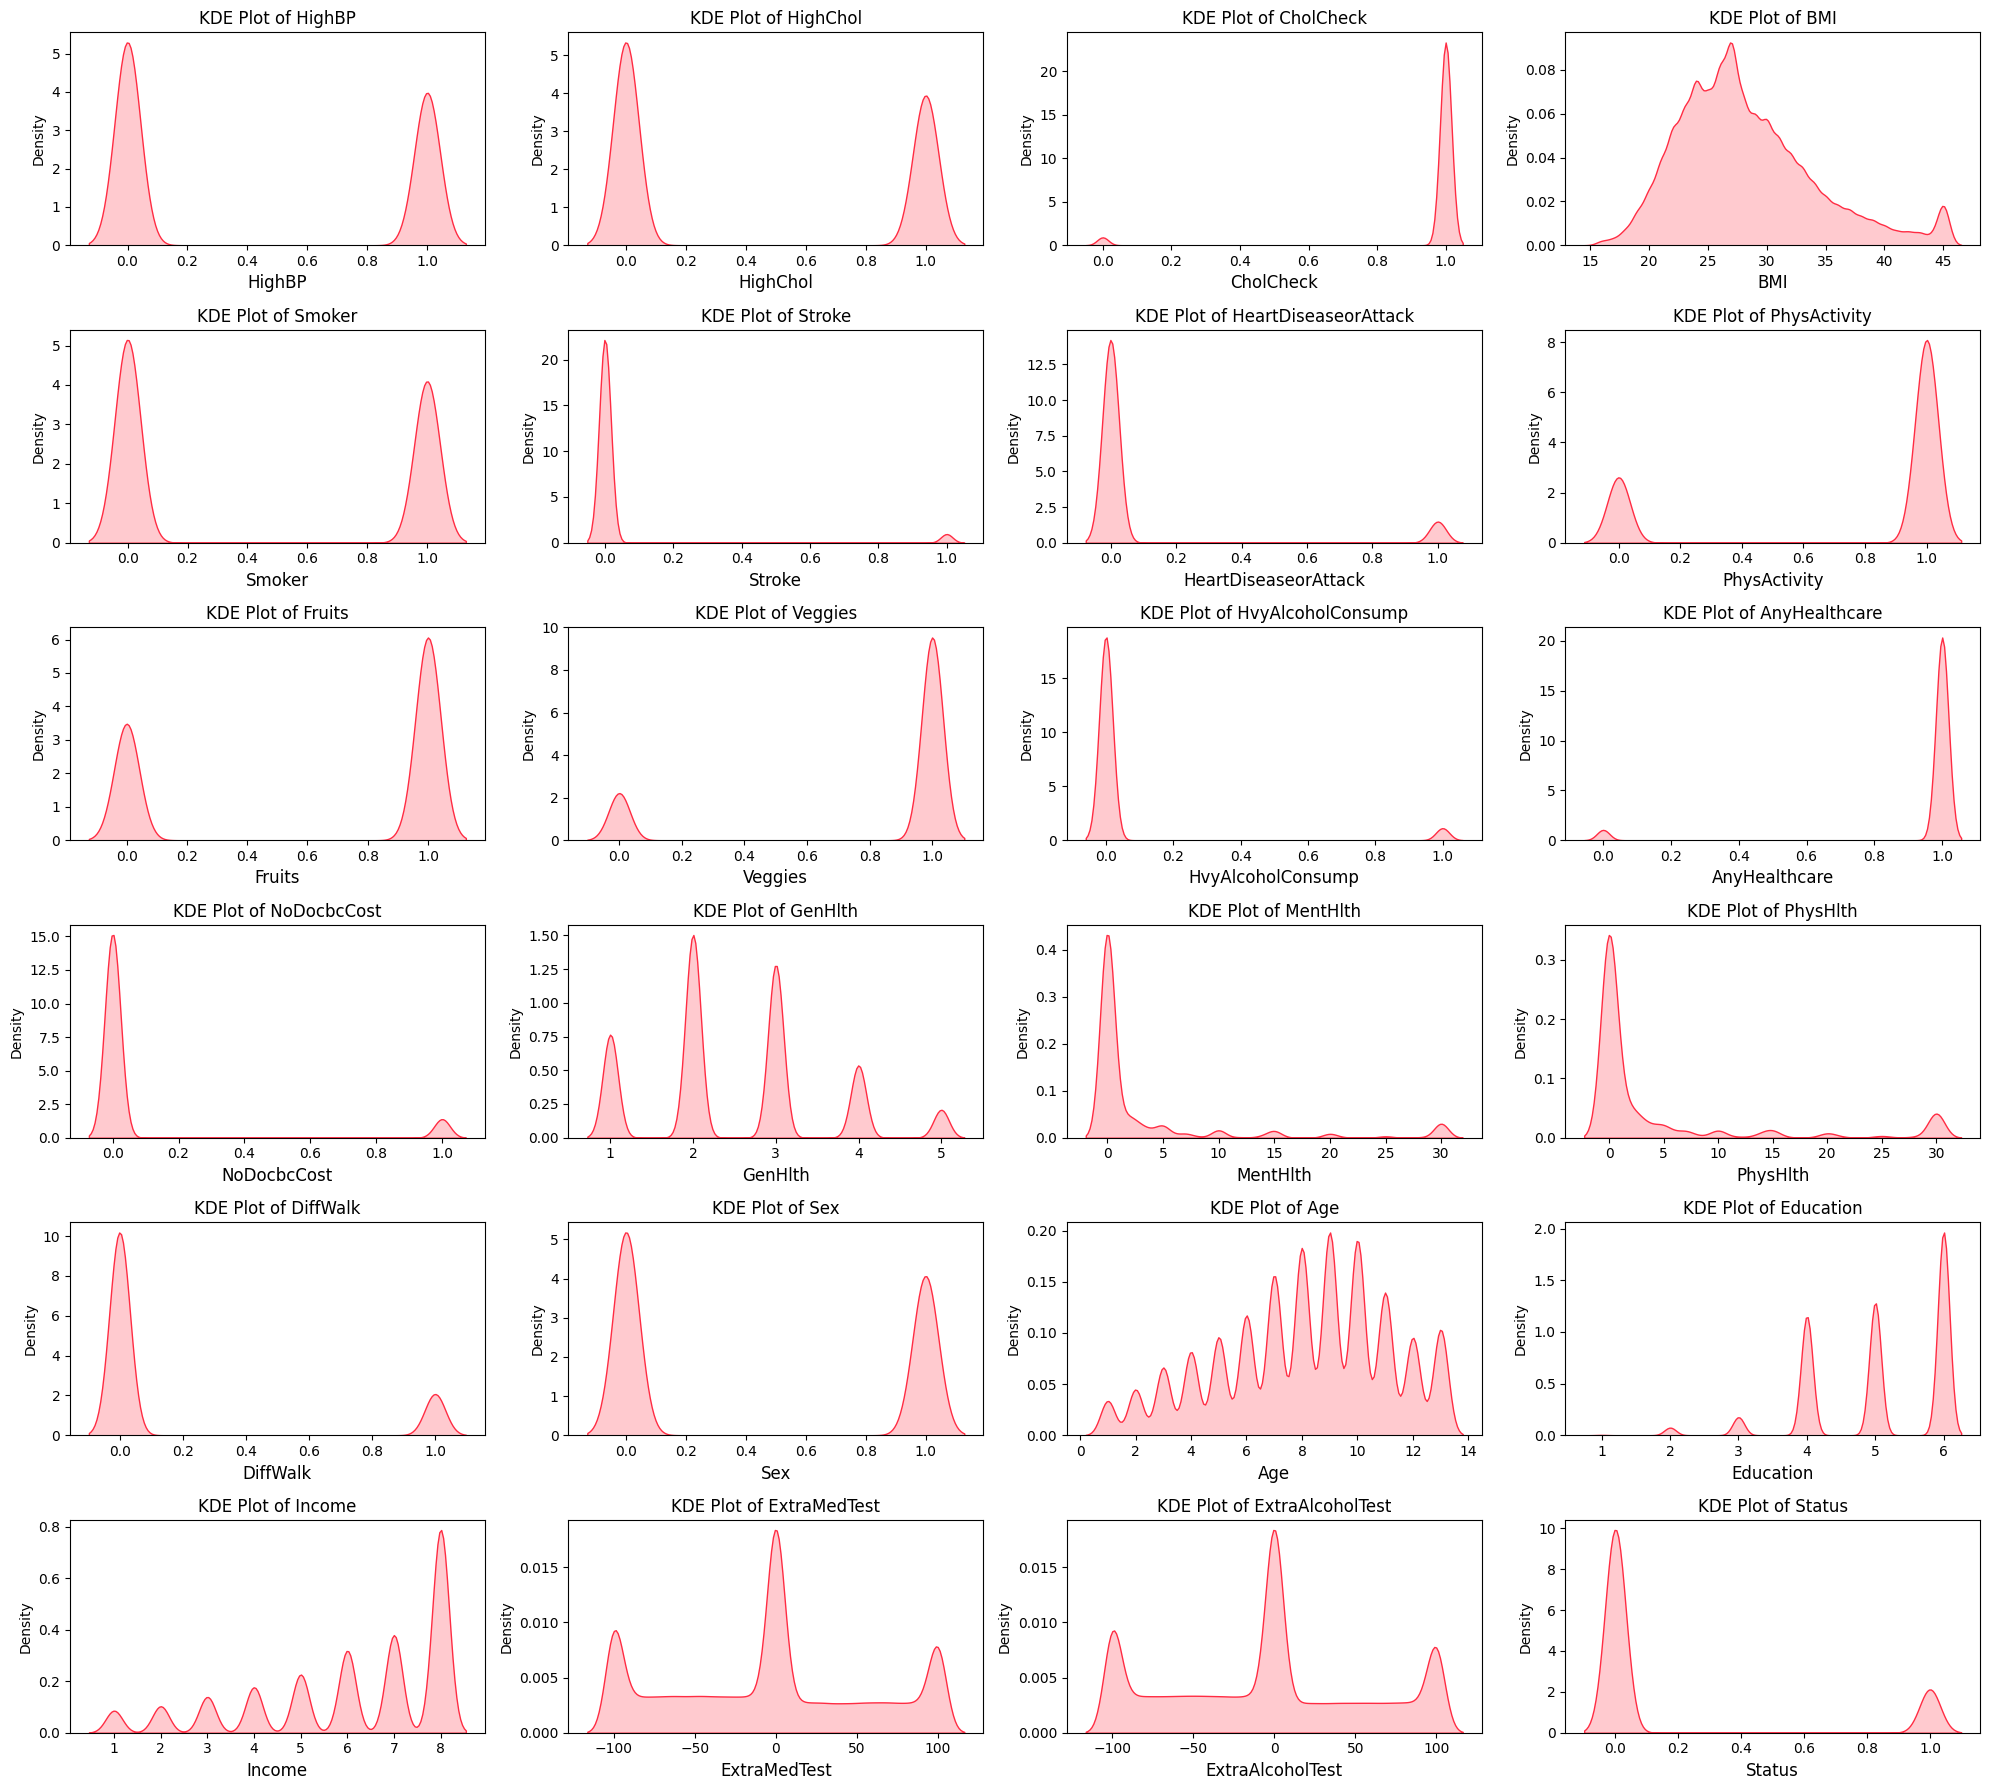

In [181]:
# Grid initialization
rows, cols = len(df_train.columns) // 4, min(4, len(df_train.columns))
fig, axes = plt.subplots(rows, cols, figsize=(20, rows * 3))  # Figure and axes

# Plot KDE for each column
for i, column in enumerate(df_train.columns):
    sns.kdeplot(
        data=df_train[column], ax=axes.flat[i], fill=True, color="#ff2c43"
    )  # KDE plot
    axes.flat[i].set_title(f"KDE Plot of {column}")  # Title
    axes.flat[i].set_xlabel(column, fontsize=12)  # X-axis label

plt.tight_layout()
plt.show()

### **Conclusion**:

- By examining the distribution of features, we can observe the following key points:

  - **Categorical Features**: The majority of the features are categorical, with binary values (`0` or `1`).

    &rarr; This characteristic will influence the choice of visualization techniques and model selection.

  - **Numerical Features**: The numerical features exhibit varying distributions, with the `BMI` feature showing a skewed distribution.

    &rarr; This observation will be considered during feature scaling and model selection.

  - **Target Variable Distribution**: The target variable (`Status`) discloses a significant imbalance, with only `16.67%` of the data belonging to the diabetic class (`1`).

    &rarr; This imbalance can potentially impact model performance and will be addressed through undersampling techniques.

### **Next Steps**:

- **In-depth Analysis**: Further analysis of feature distributions will be conducted to identify potential relationships between features and the target variable.

- **Feature Engineering**: The analysis of feature distributions provides valuable insights for feature engineering. Techniques such as `feature scaling` will be applied to prepare the data for model training.

- **Model Selection**: The distribution of features and target variable will influence the choice of models. Techniques such as `Logistic Regression`, `Random Forest`, and `XGBoost` are potential candidates for classification tasks.

- **Imbalanced Data Handling**: The imbalanced distribution of the target variable will be addressed through techniques such as `undersampling` or `oversampling` to ensure model performance is not biased towards the majority class.


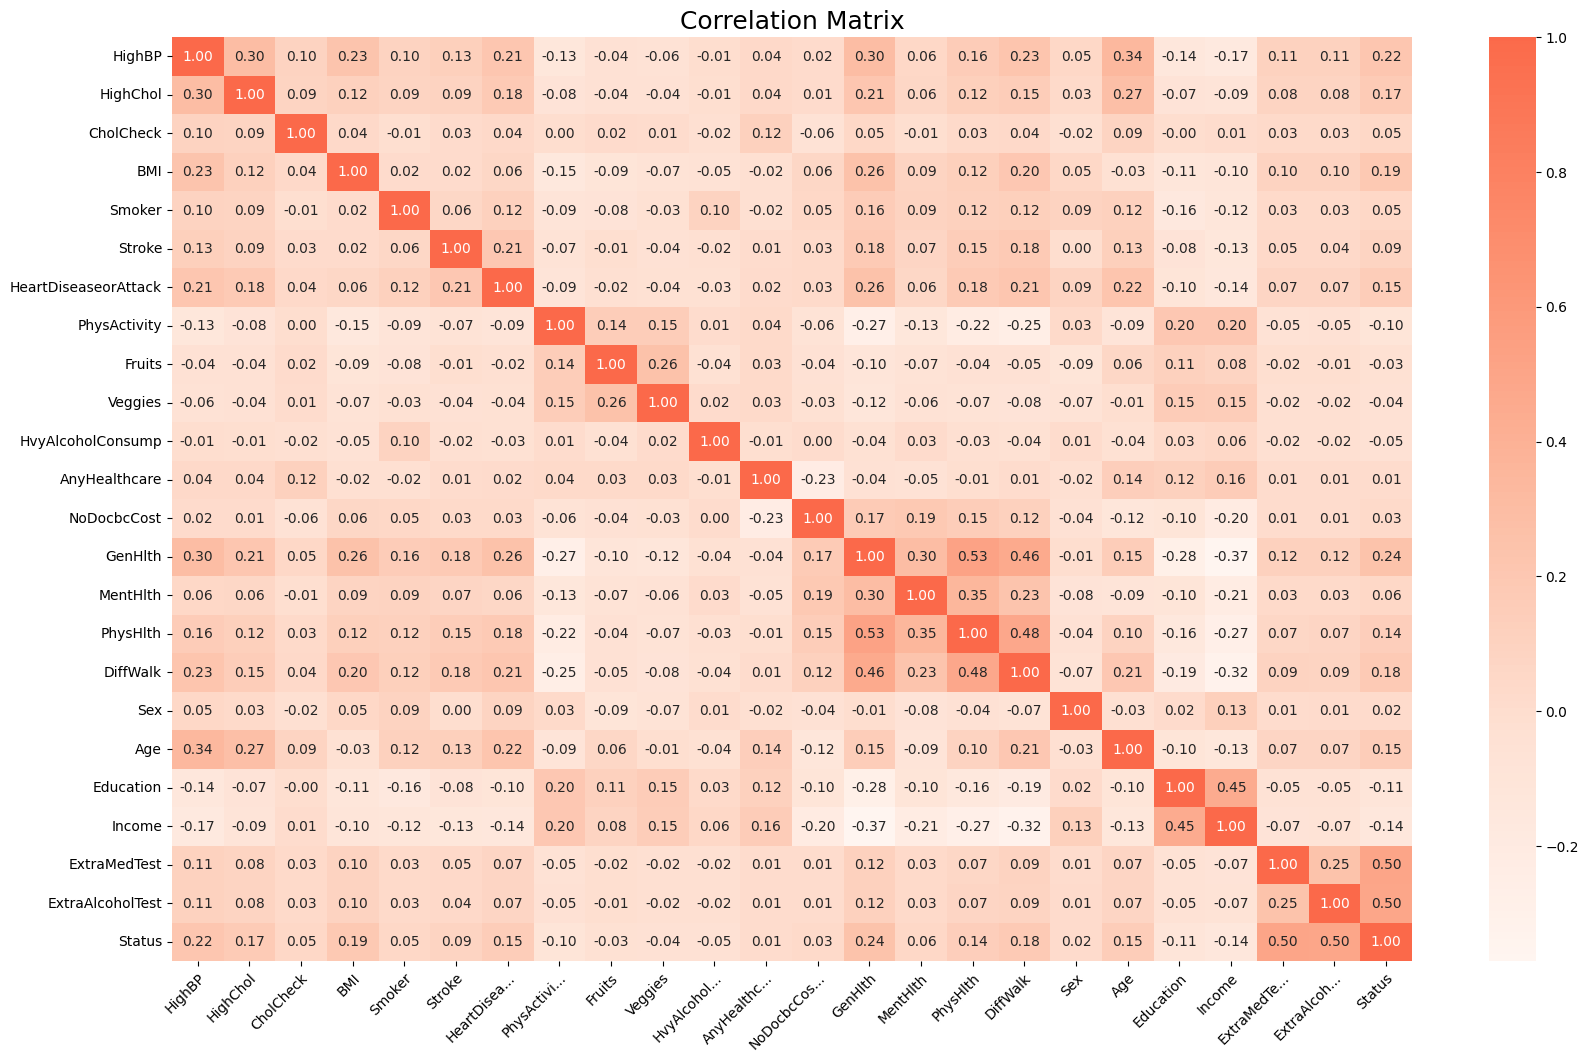

In [204]:
# Correlation matrix
fig, ax = plt.subplots(figsize=(20, 12))

sns.heatmap(df_train.corr().round(3), annot=True, fmt=".2f", cmap="Reds", center=True)

plt.title("Correlation Matrix", fontsize=18)  # Adjust title font size
plt.xticks(rotation=45, ha="right", rotation_mode="anchor")
plt.yticks(rotation=0)  # Rotate y-axis labels for better readability
ax.set_xticklabels(
    [
        (
            label.get_text()[:10] + "..."
            if len(label.get_text()) > 10
            else label.get_text()
        )
        for label in ax.get_xticklabels()
    ]
) # Show ellipsis for long column names


plt.show()